# Import Libraries

In [1]:
# Auto reloads src modules.
%load_ext autoreload
%autoreload 2

# Import custom libraries.
import os
import sys
from pathlib import Path, PurePath

if Path.cwd().parts[-1] != "crnn-pytorch":
    proj_root = str(Path.cwd().parents[0])
if proj_root not in sys.path:
    sys.path.append(proj_root)

# Changes the working directory from a jupyter_notebook to the project directory.
if Path.cwd().parts[-1] == "jupyter_notebooks":
    os.chdir(proj_root)

from src.dataset import extract_jpg_meta, WbsinImageDataset
from torchvision import transforms
import torch
import matplotlib.pyplot as plt
import pandas as pd
import xml.etree.ElementTree as ET

from PIL import Image
import altair as alt
alt.data_transformers.disable_max_rows()
from tqdm.auto import tqdm
import numpy as np
tqdm.pandas()
import cv2
from PIL import Image as im
from scipy.ndimage import interpolation as inter

In [4]:
processed_path = Path.cwd() / "data" / "processed"
X_transforms = transforms.Compose(
    [
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize((160, 1440)),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)),
    ]
)

wbsin_dataset = WbsinImageDataset(
    meta_file=(processed_path / "processed_wbsin_meta.csv"), transform=X_transforms
)

In [5]:
train_size = int(0.8 * len(wbsin_dataset))
test_size = len(wbsin_dataset) - train_size

train_dataset, test_dataset = torch.utils.data.random_split(
    wbsin_dataset,
    [train_size, test_size],
    generator=torch.Generator().manual_seed(42),
)


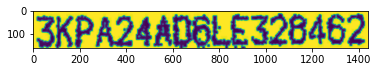

In [25]:
sample_image = wbsin_dataset[7][0]
plt.imshow(transforms.ToPILImage()(sample_image), interpolation="bicubic")